<a href="https://colab.research.google.com/github/PedroAdair/Series-de-tiempo/blob/main/VisualizacionDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#estadisiticos
import scipy.stats as stats
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as stg
import statsmodels.tsa.seasonal as stseasonal
from statsmodels.tsa.filters.hp_filter import hpfilter



## Ejemplo del S&P500

In [54]:
data = pd.read_csv('/content/drive/MyDrive/SeriesTiempo/Index2018.csv')
df_comp = data.copy()

¿Cuantos valores faltantes tengo?

In [55]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Visualizacion

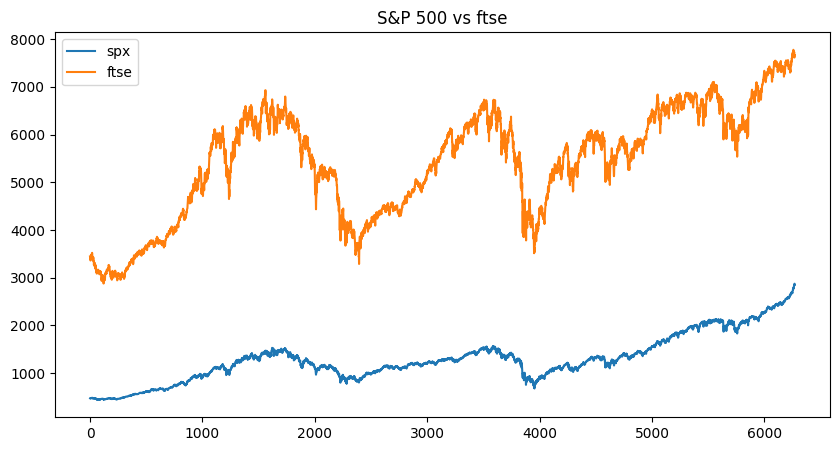

In [56]:
df_comp.spx.plot(figsize=(10,5))
df_comp.ftse.plot(figsize=(10,5))
plt.title('S&P 500 vs ftse')
plt.legend()
plt.show()

## Q-Q Plot

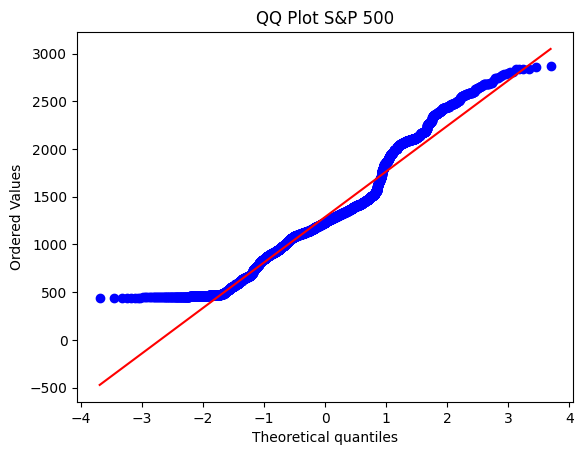

In [57]:
stats.probplot(df_comp.spx, dist="norm", plot=plt)
plt.title("QQ Plot S&P 500")
plt.show()

## Transformacion a series de tiempo

In [58]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True) #dayfirst = True para asumir dd-mm-yyyy. ya que por defenco asume mm-dd-yyyy

In [59]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [60]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

Usar la fecha como indice en series de tiempo

In [61]:
df_comp.set_index('date', inplace=True)

In [62]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Frecuencia

In [63]:
df_comp.asfreq(freq='b')

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [64]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Agregar/eliminar  columnas

In [65]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [66]:
df_comp["market_value"] = df_comp.spx
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]

####

In [67]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


## Particion del entrenamiento/prueba

Para este caso, haremos una particion 80/20 en la particion entrenamiento/prueba.

In [68]:
#step1. saber la longitud del conjunto
len(df_comp)
#determinar el tamaño de la particion
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [69]:
df_test.head(n=3)

,market_value
date,
2013-04-04,1559.979316
2013-04-05,1553.278930
2013-04-08,1563.071269


In [70]:
df.tail(n=3)

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


### Ejemplo White Noise

In [71]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.var(), size=len(df))


In [72]:
df["wn"] = wn

<ipython-input-72-82553af91701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wn"] = wn


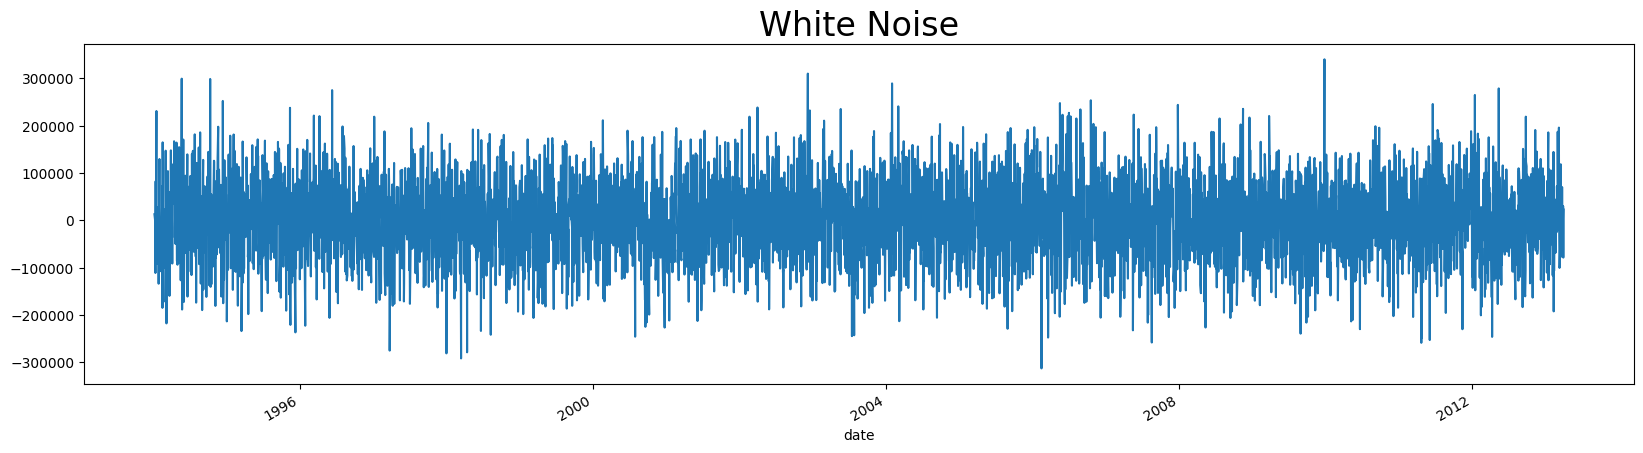

In [73]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise", size=24 )
plt.show()

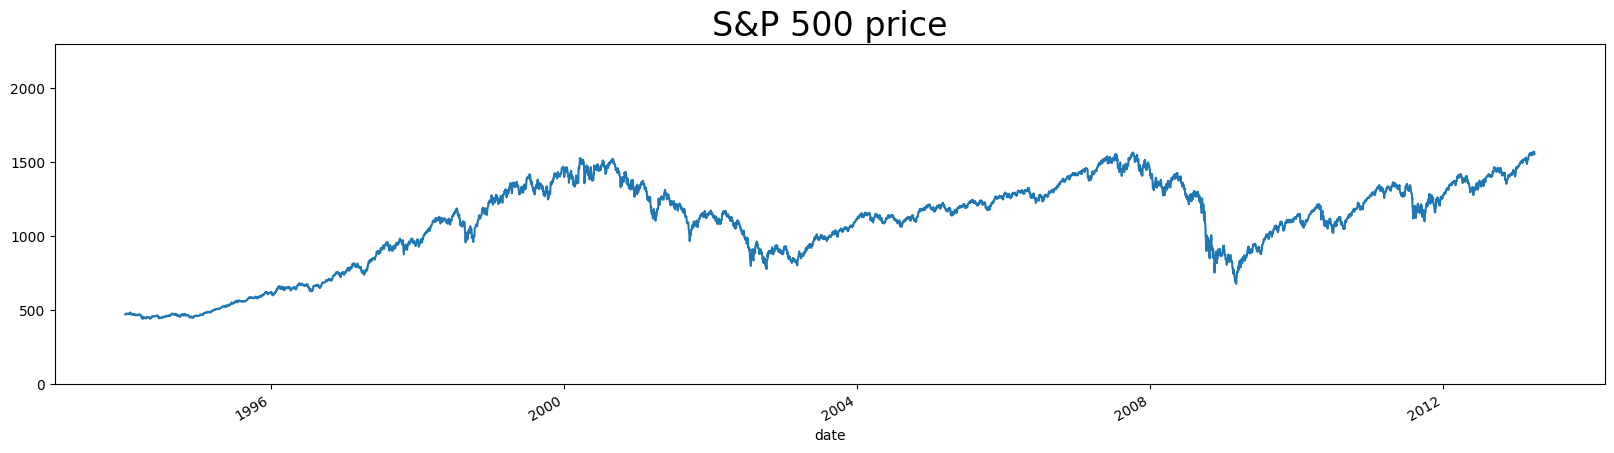

In [74]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P 500 price", size=24 )
plt.ylim(0,2300) # para que tanto la whitenoise comoo S&P 500 esten en el mismo rango visual
plt.show()

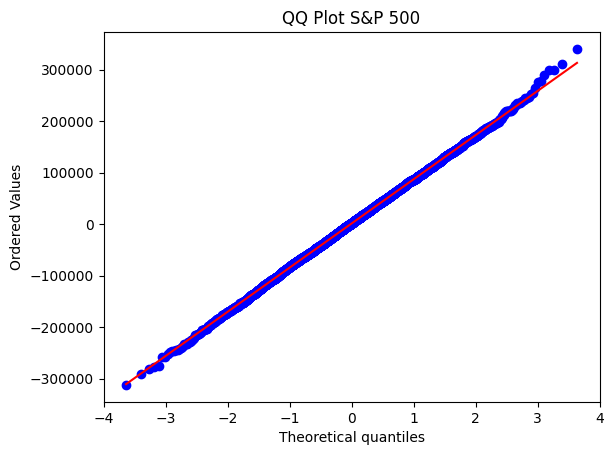

In [75]:
stats.probplot(df.wn, dist="norm", plot=plt)
plt.title("QQ Plot S&P 500")
plt.show()

## Ejemplo de caminata aleatoria

Aqui se realizo una simulacion del indice S&P500 como una caminata aleatoria. es decir
$$ P_t = P_{t-1} + \varepsilon $$
donde $\varepsilon \sim WN(\mu, \sigma)$

In [76]:
rw = pd.read_csv('/content/drive/MyDrive/SeriesTiempo/RandWalk.csv') #simulacion de una caminata aleatoria

In [77]:
rw = pd.read_csv('/content/drive/MyDrive/SeriesTiempo/RandWalk.csv') #simulacion de una caminata aleatoria
rw.date = pd.to_datetime(rw.date, dayfirst=True) #dayfirst = True para asumir dd-mm-yyyy. ya que por defenco asume mm-dd-yyyy
rw.asfreq(freq='b') #frecuencia de dia laboral
rw.set_index('date', inplace=True)
print(rw.describe())
rw.head(3)

             price
count  7029.000000
mean   1269.648367
std     443.999180
min     574.382397
25%     931.488599
50%    1155.773451
75%    1488.957260
max    2715.508720


,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831


In [78]:
#agrear el randomwalk al df del S&P500
df["rw"] = rw.price
df.head()

<ipython-input-78-6ed760f635f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rw"] = rw.price


,market_value,wn,rw
date,,,
1994-01-07,469.90,13206.677095,1122.139662
1994-01-10,475.27,1676.332771,1080.347860
1994-01-11,474.13,-8810.565863,1082.095245
1994-01-12,474.17,-110933.589044,1083.639265
1994-01-13,472.47,82845.051525,1067.146255


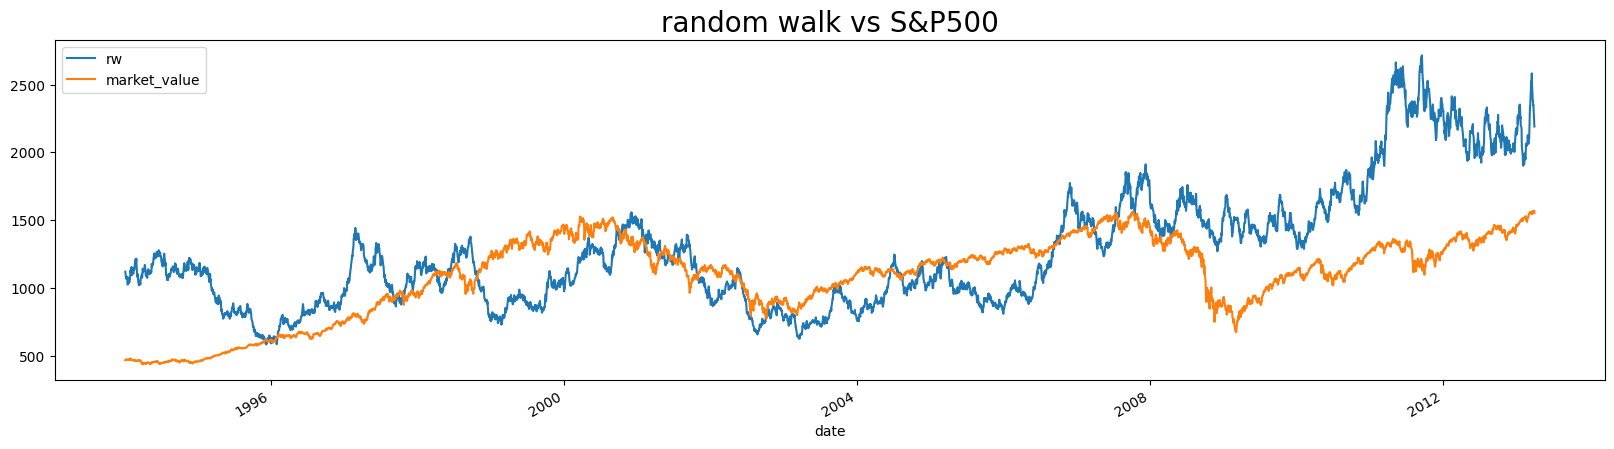

In [79]:
#plot de las 3 columnas
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title("random walk vs S&P500", size = 20)
plt.legend()
plt.show()

Notamos cierto parecido entre el S&P500 y una simulacion de cmainarta aleatoria

In [80]:
def randomWalk(n_steps:int,initialPrice:float, var:float):
  sample = np.random.normal(loc=0, scale=var, size=n_steps)
  rw = []
  for i in sample:
    initialPrice += i
    rw.append(initialPrice)
  return rw

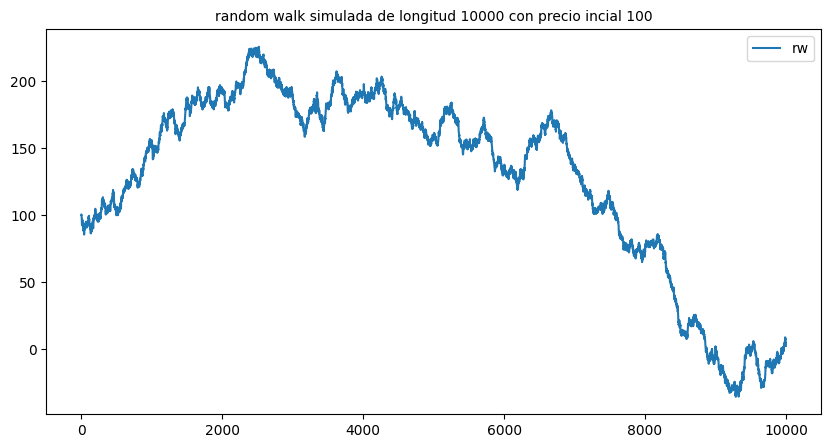

In [81]:
n_steps = 10000
initialPrice = 100
var = 1


rw1 = randomWalk(n_steps=n_steps,initialPrice=initialPrice,var=var)
df1 = pd.DataFrame(rw1, columns=["rw"])
df1.plot(figsize=(10,5))

plt.title("random walk simulada de longitud {} con precio incial {}".format(n_steps,initialPrice), size = 10)
plt.show()

## Estacionareidad

In [82]:
#en Python, la Prurba de Dickey-Fuller para series estacionarias se encuentra programada en "statsmodels" en los metodos de series de tiempo (tsa.stattools) como el metodoo addfuller
#pdf_mv prueba de Dickey-Fuller en el mercado de valores
pdf_mv = sts.adfuller(df.market_value)
pdf_mv

(-1.7341463076798191,
 0.41361066122334234,
 18,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 39862.6025921832)

##### Prueba aumentada de Dicker-Fuller
**E**n Python, la Prueba de Dickey-Fuller para series estacionarias se encuentra programada en "*statsmodels*" en los metodos de series de tiempo (*tsa.stattools*) como el metodoo addfuller. del metodo antes descrito  se obtiene la siguiente informacion:

| nombre | tipo |Descripcion        | Ejemplo |
|--------|------|-------------------|---------|
|adf     | float|The test statistic.| -1.7341 |
|pvalue  | float|MacKinnon's approximate p-value based on MacKinnon (1994, 2010).| 0.4136|
|usedlag | int |The number of lags used. | 18 |
|nobs    | int |The number of observations used for the ADF regression and calculationof the critical values | 4996 |
|critical values | dict| Critical values for the test statistic at the 1 %, 5%, and 10 % levels. Based on MacKinnon (2010)| {'1%': -3.4316,'5%': -2.8621,'10%': -2.5670}|
| icbest | float| The maximized information criterion if autolag is not None. resstore| 39862.6025

#### Ejemplo 1 S&P500
¿Como interpretarlo?

* $p_{\text{valor}} < \alpha \Rightarrow \neg  H_0 \Rightarrow H_1$: Para el ejemplo de *pdf_mv*, tenemos que el $p_{\text{valor}}$ es de  	0.4136, el cual es mayor que 0.1 (10%),0.05 (5%) y 0.01 (1%). Por lo cual no podemos rechazar $H_0$ (esto no quiere decir que $H_0$ es cierta).
* $\lambda < \lambda_{\text{critic %}} \Rightarrow \neg  H_0 \Rightarrow H_1$.  Aqui tomamos $\lambda= -1.7341$, el cual es el valor del es tadistico aumentado de dicker fuller, mientras que los % criticos son los valores del diccionario. Por ejemplo para 5\%, se tiene un $\lambda_{\text{5%}}= -2.86$, es decir $\lambda \not < \lambda_{\text{5%}}$

In [83]:
pdf_mv[0] < pdf_mv[4]['10%']

False

#### Ejemplo 2: white noise


In [84]:
pdf_wn = sts.adfuller(df.wn)
pdf_wn

(-69.21738625966417,
 0.0,
 0,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 127323.96518430005)

Usando el $p-$valor

In [85]:
alpha = 0.01 #(0.1=10%, 0.05 = 5% y 0.01=1%)
p1 = pdf_wn[1] < alpha #(1%)
if p1:
  print("Con una confianza del {}%, la serie es estacionaria. el p-valor es del {}".format((1-alpha)*100, pdf_wn[1]))
else:
  print("No rechazo H0")

Con una confianza del 99.0%, la serie es estacionaria. el p-valor es del 0.0


usando el valor $\lambda$ de contraste

In [86]:
def pruebaDickeyFuller(data:pd.Series):
  pdf_data = sts.adfuller(data)
  alphas  = [0.1, 0.05,0.01] #(0.1=10%, 0.05 = 5% y 0.01=1%)
  Alphas  = []
  lambdas = [ "10%","5%","1%"]
  Lambdas = []
  print("****"*20)
  print( "****************************** Dickey Fuller Test ******************************")
  print("****"*20)
  print("***                              Datos de la serie                           ***")
  print("Total de observaciones: {}".format(pdf_data[3]))
  print("****"*20)
  print("***                            Analisis del p-valor                          ***")
  p_val = pdf_data[1]

  for alpha in alphas:
    if p_val < alpha:
      print("Con una confianza del {}%, la serie es estacionaria. el p-valor es del {}".format((1-alpha)*100, pdf_data[1]))
      Alphas.append(True)
    else:
      print("No rechazo H0: p_val = {} > alpha= {}".format(round(p_val,3), alpha))
      Alphas.append(False)
  print("****"*20)
  print("***          Analisis del valor de la estadistica de Dickey Fuller           ***")
  lamda_dft = pdf_data[0]
  for lambda_key in lambdas:
      lambda_critic = pdf_data[4][lambda_key]
      if lamda_dft < lambda_critic:
        print("Para un valor del {}, se satisface la comparacion del valor de lambda".format(lambda_key))
        Lambdas.append(True)
      else:
        print("Para un valor del {}, no se satisface la comparacion del valor de lambda".format(lambda_key))
        Lambdas.append(False)
  print("****"*20)


In [87]:
pruebaDickeyFuller(df.wn)

********************************************************************************
****************************** Dickey Fuller Test ******************************
********************************************************************************
***                              Datos de la serie                           ***
Total de observaciones: 5014
********************************************************************************
***                            Analisis del p-valor                          ***
Con una confianza del 90.0%, la serie es estacionaria. el p-valor es del 0.0
Con una confianza del 95.0%, la serie es estacionaria. el p-valor es del 0.0
Con una confianza del 99.0%, la serie es estacionaria. el p-valor es del 0.0
********************************************************************************
***          Analisis del valor de la estadistica de Dickey Fuller           ***
Para un valor del 10%, se satisface la comparacion del valor de lambda
Para un valor del 5%,

## Estacionalidad

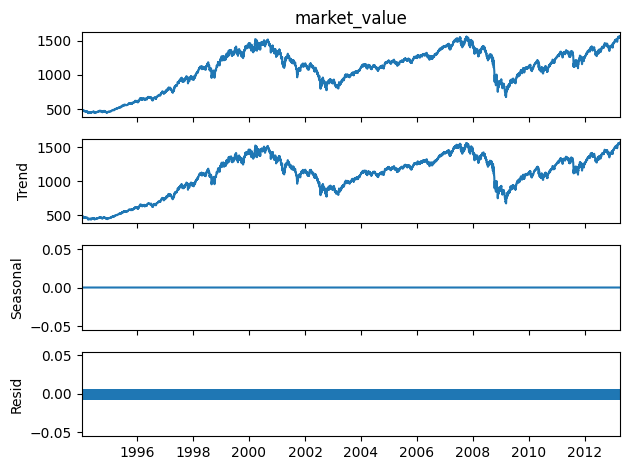

In [88]:
#df.market_value.asfreq(freq='b')
s_dec_additive =  stseasonal.seasonal_decompose(x=df.market_value, model="additive", period=1)
s_dec_additive.plot()
plt.show()

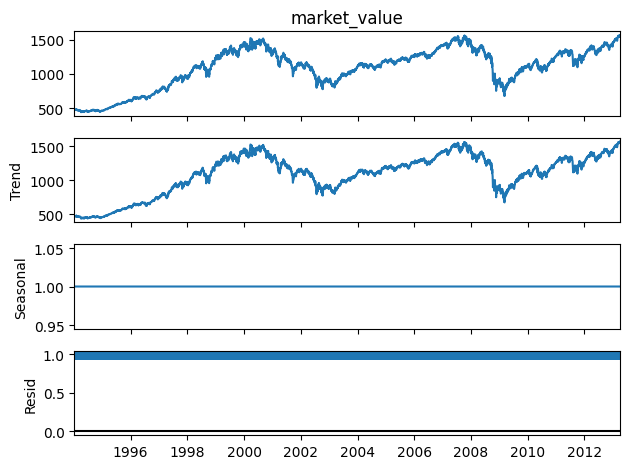

In [89]:
s_dec_multiplicative =  stseasonal.seasonal_decompose(x=df.market_value, model="multiplicative", period=1)
s_dec_multiplicative.plot()
plt.show()

En ambos analisis, no se noto un valor significativo en el componenente estacional para decir que los precios del S&P500 se comportan  de manera estacional

### Filtro de Hodrick-Prescott

Realiza una descomoposicion de la serie de tiempo mediante un modelo (para el caso aditvo)
$$ X_t = \mu_t + c_t$$

Mietras que para el caso multiplicativo

$$ X_t = \mu_t*c_t$$


In [90]:
df = pd.read_csv("/content/drive/MyDrive/SeriesTiempo/macrodata.csv", index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'Real GDP')]

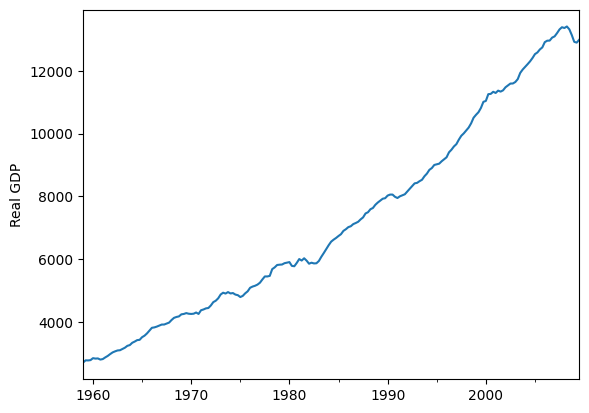

In [91]:
ax = df["realgdp"].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel="Real GDP")

#### Descomposicion aditiva

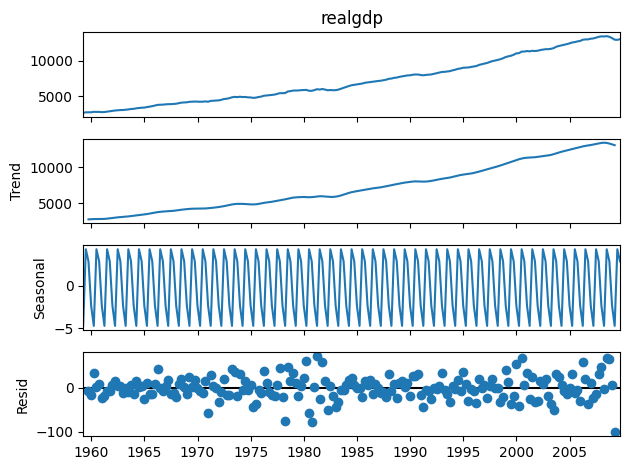

In [92]:
s_dec_additive =  stseasonal.seasonal_decompose(x=df.realgdp, model="additive")
s_dec_additive.plot()
plt.show()

Ahora aplicaos el filtro de Hodrick-Prescott

In [93]:
gpd_cicle, gpd_trend = hpfilter(df.realgdp, lamb=1600)

In [94]:
df["trend"] = gpd_trend
df["cicle"] = gpd_cicle

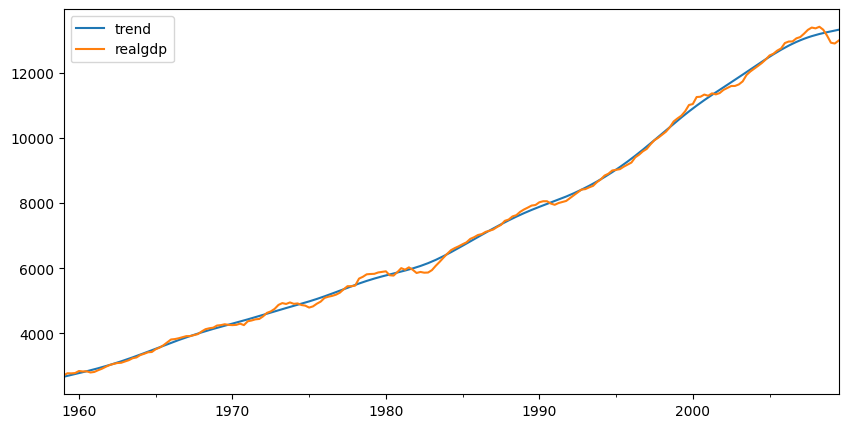

In [95]:
df[["trend", "realgdp"]].plot(figsize=(10,5))
plt.show()


Vemos como se acerca la tendencia y el real GDP

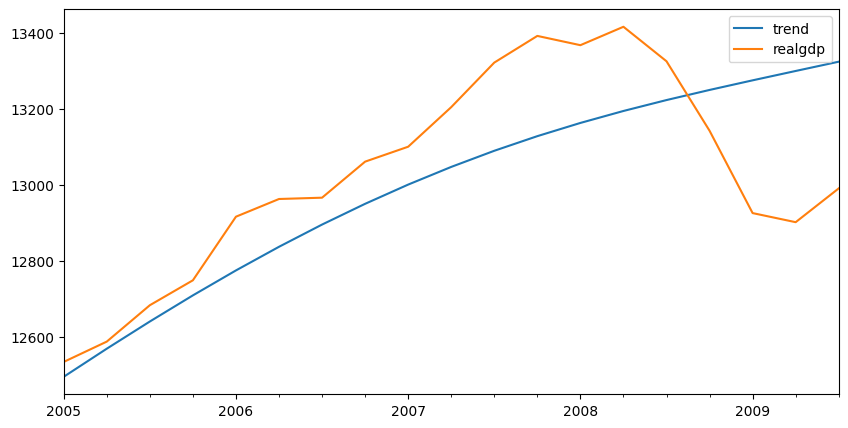

In [96]:
#ejemplo  a partir del 2005
df[["trend", "realgdp"]]["2005-01-01":].plot(figsize=(10,5))
plt.show()

### Ejemplo con el conjunto de datos de pasajeros

In [97]:
df = pd.read_csv("/content/drive/MyDrive/SeriesTiempo/airline_passengers.csv", index_col=0, parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualicemos los datos

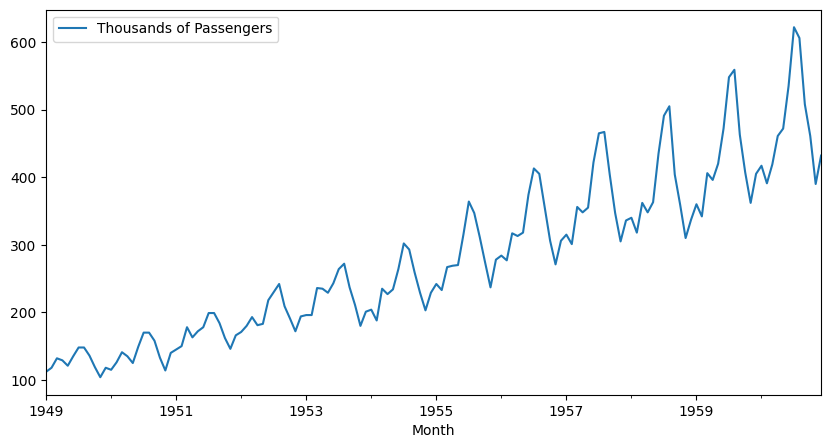

In [98]:
df.plot(figsize=(10,5))
plt.show()

Podemos ver una tendencia creciente, con una posible estacionalidad. Ahora realizaremos un analisis sobre la tendencia

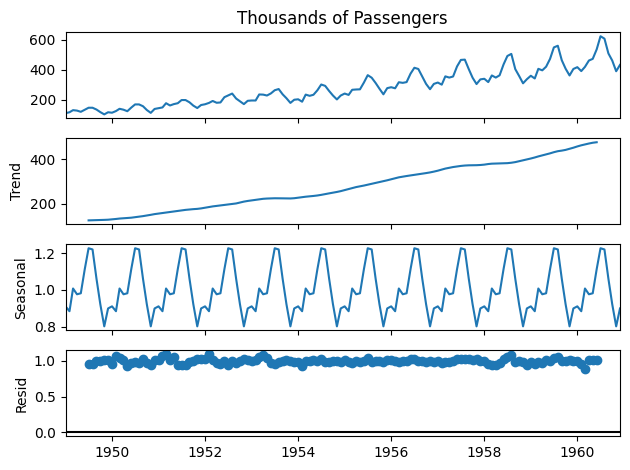

In [104]:
result =  stseasonal.seasonal_decompose(x=df["Thousands of Passengers"], model="additive")
result.plot( )
plt.show()

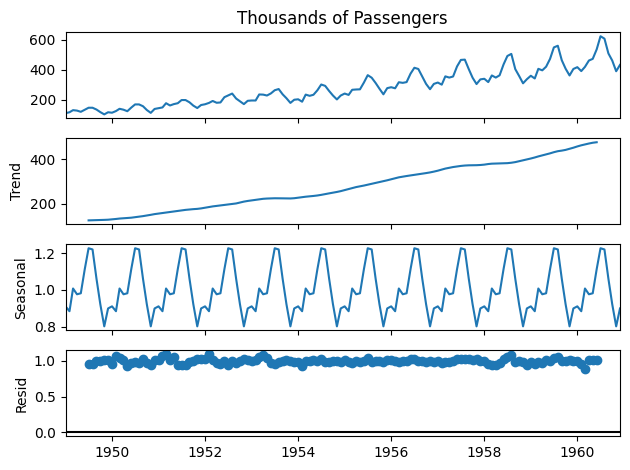

In [105]:
result =  stseasonal.seasonal_decompose(x=df["Thousands of Passengers"], model="multiplicative")
result.plot( )
plt.show()

En efecto, podemos notar un componente estacional con picos en los meses de verano, con una tendencia creiciente y con residuales menores a 50 (K de pasajeros).

¿Como seleccionar un modelo aditivo o un modelo multiplicativo?

* Con base a la tendencia, es decir si la tendencia parece seguir una formula lineal $X_t = \mu_t + \varepsilon_t$, entonces el modelo mas apropiado sera uno aditivo

* Si el aumento es multiplicativo (ejemplo un aumento de *2 cada año)

## Autocorrelacion

Existe relacion entre Una serie con sus valores pasados (lags). para esto definimos la autocorrelacion con lag $k$ como $$Corr(x_{t}, x_{t-k})$$ para la serie de tiempo $(X_t)$. En Python, contamos con la funcion *acf* (auto-correlation function) en el modulo **statsmodels.graphics.tsaplots** mediante el metodo *plot_acf*

In [118]:
data = pd.read_csv('/content/drive/MyDrive/SeriesTiempo/Index2018.csv', index_col=0,parse_dates=True)
df = data.copy()
df.asfreq(freq='b')
df["market_value"] = df.spx
del df["spx"]
del df["dax"]
del df["ftse"]
del df["nikkei"]
df.head()

,market_value
date,
07/01/1994,469.90
10/01/1994,475.27
11/01/1994,474.13
12/01/1994,474.17
13/01/1994,472.47


Para realizar el plot de la funcion de autocorrelacion nos apoyamos del modulo statsmodels.graphics.tsaplots mediante el metodo *plot_acf*, el cul requiere de los siguientes parametros

* x: Es la serie de tiempo sobre la cual se calculara la autocorrelacion
* lags: Es un entero que indica el numero de observaciones hacia atras hasta las cuales realizara el calculo de autocorrelacion, por defecto sera sobre toda la longitud de la serie, pero se recomienda que en series de tiempo muy lagas, solo se use un limite, por ejemplo en este caso como las observaciones son diarias sobre los dias laborales, se usara solo un retraso de 40 obsercaciones.
* zero: Es un Booleano que ns indica si queremos calcular la autocorrelacion con un lag de 0 (el cual siempre es 1).

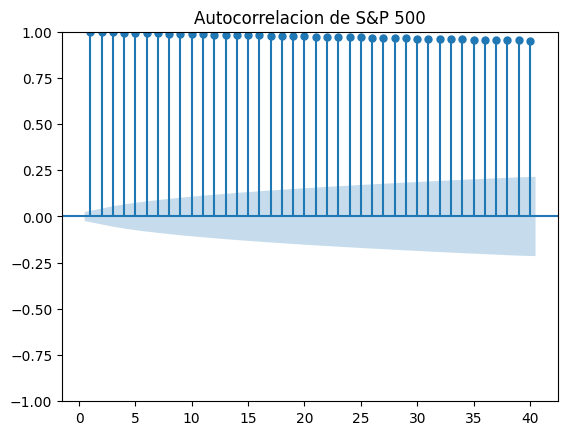

In [129]:
stg.plot_acf(x= df.market_value,
             lags=40,
             title="Autocorrelacion de S&P 500",
             zero=False)
plt.show()

  Aqui notamos que las primeras 40 observaciones de lag son superiores a 0.8. Mientras que el area sombreada de azul representa el nivel de significancia sobre el valor (si son significactivamente mayores que 0 los valores)

## Autocorrelacion Parcial

Si queremos medir el efecto directo entre $x_t$ y $x_{t-k}$ usamos la autocorrelacion parcial (es decir, unicamente la relacion entre el precio de hoy y el de ayer para $k=1$).

Por otra parte,  si queremos medir el efecto directo e indirecto (es decir, como los precios de hoy son influenciados por los de ayer, los que estan influenciados por los de antier, etc) usamos la autocorrelacion.

<Figure size 2000x500 with 0 Axes>

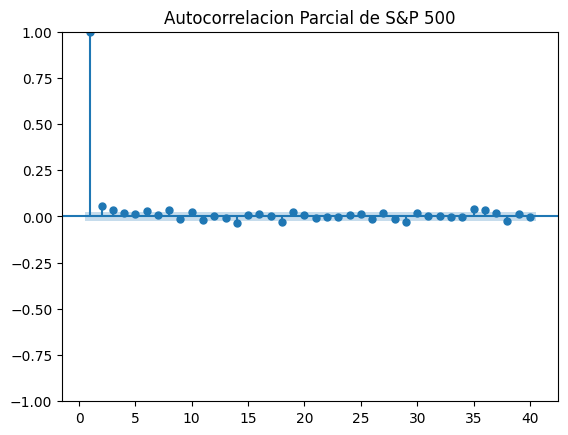

In [134]:
#autocorrelacion de la serie de tiempo
plt.figure(figsize=(20,5))
stg.plot_pacf(x= df.market_value,
             lags=40,
             title="Autocorrelacion Parcial de S&P 500",
             zero=False,
             method = ("ols"))
plt.show()

Por ende notamos que los efectos de la PACF son mucho mas fuertes, por que solo miden el efecto directo entre una observacion y su lag

## Visualizar series de tiempo